In [1]:
import numpy as np
np.set_printoptions(threshold=np.inf)
from astropy.io import fits
from astropy.table import Table
import scipy
import matplotlib.pyplot as plt

# %pip install fortranformat
# %pip install rpy2
from survival_analysis import setup, ats_fit, kaplan_meier

hdul = fits.open("Data/HIMaNGADR4Cross_sampgalMA.fits")
dataTable = Table(hdul[1].data)

Aligned_color = 'tab:blue'
MA_color = 'tab:orange'

Error importing in API mode: ImportError("dlopen(/opt/anaconda3/lib/python3.12/site-packages/_rinterface_cffi_api.abi3.so, 0x0002): Library not loaded: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib\n  Referenced from: <05EE76C0-33BF-3D4C-BC56-84005241BC88> /opt/anaconda3/lib/python3.12/site-packages/_rinterface_cffi_api.abi3.so\n  Reason: tried: '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file)")
Trying to import in ABI mode.


In [2]:
print(len(dataTable))
dataTable

7290


PLATEIFU_1,MANGAID,OBJRA,OBJDEC,LOGMSTARS,SINI,VOPT,SESSION,EXP,RMS,LOGHILIM200KMS,PEAK,SNR,FHI,EFHI,LOGMHI,VHI,EV,WM50,WP50,WP20,W2P50,WF50,DW,PR,PL,AR,BR,AL,BL,NEGDET,BLSTRUCT,conflag,conf_prob,plateifu_2,ang_stellar,ang_stellar_err,ang_ha,ang_ha_err,GroupID_old,GroupSize_old,GroupID,GroupSize
str11,str9,float64,float64,float64,float64,float32,str111,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float64,str12,float32,float32,float32,float32,int32,int32,int32,int32
8445-6104,1-410676,207.301450689,35.2847067132,8.800740441597593,0.6713510363351769,4947.4,AGBT17A_012_125,896.8325,1.3352222,-999.0,0.04400497,31.957037,13.841522,0.14244927,10.223567,5031.881,3.8421237,437.74164,412.9573,447.16925,426.44095,431.89926,13.587248,21.731794,36.670807,86.56257,0.33677825,130.36046,-0.49722582,0,0,1,0.9998407885434998,,nan,nan,nan,nan,-2147483648,-2147483648,1,2
8445-6104,1-410676,207.30145263671875,35.284706115722656,8.800740242004395,0.6713510155677795,4947.473,ALFALFA,48.0,2.72,-999.0,0.028220968,46.4,12.52,0.14,10.22,5033.0,3.0,-999.0,-999.0,174.0,-999.0,443.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,0,1,0.6025450229644775,,nan,nan,nan,nan,-2147483648,-2147483648,1,2
9027-12705,1-633856,244.38849,31.57767,9.154779906086953,0.6265994793238873,6694.0,AGBT17A_012_256,777.9478,2.0950632,-999.0,0.050249945,22.98493,1.7907776,0.08779727,9.581665,6691.475,2.8884192,39.67331,21.339617,38.51207,21.339617,23.550615,11.747953,41.874954,41.874954,43.754837,1.3129652,45.83837,-1.4284388,0,0,0,0.0,,nan,nan,nan,nan,-2147483648,-2147483648,2,2
9027-12705,1-633856,244.38803100585938,31.57815170288086,9.154779434204102,0.6265994906425476,6694.1787,ALFALFA,48.0,2.23,-999.0,0.05258296,27.9,1.55,0.05,9.53,6692.0,1.5,-999.0,-999.0,115.0,-999.0,28.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,0,0,0.0,,nan,nan,nan,nan,-2147483648,-2147483648,2,2
8461-12703,1-166754,147.32578151,43.3517193284,9.34160069204006,0.9273774506790009,4921.6,AGBT17A_012_286-AGBT17A_012_89,1792.3394,1.0419652,-999.0,0.030008236,27.799654,5.295514,0.083129294,9.790322,4940.931,3.0711448,244.61201,228.27022,250.82713,228.29388,229.1337,12.838967,25.006863,24.98156,103.56796,0.74405813,88.78787,-0.6239708,0,0,0,0.0,,nan,nan,nan,nan,-2147483648,-2147483648,3,2
8459-3704,1-166754,147.32578151,43.3517193284,9.34160069204006,0.9273774506790009,4921.6,AGBT17A_012_286-AGBT17A_012_89,1792.3394,1.0419652,-999.0,0.030008236,27.799654,5.295514,0.083129294,9.790322,4940.931,3.0711448,244.61201,228.27022,250.82713,228.29388,229.1337,12.838967,25.006863,24.98156,103.56796,0.74405813,88.78787,-0.6239708,0,0,0,0.0,,nan,nan,nan,nan,-2147483648,-2147483648,3,2
8446-12701,1-418128,203.635904637,36.0481238489,9.13614641187373,0.9475080630685043,6992.1,AGBT17A_012_139,896.8103,1.3680502,-999.0,0.021790048,14.927812,3.5522966,0.09659552,9.918985,7006.939,3.4737642,203.57364,195.80556,210.33115,196.28484,197.83011,9.43128,18.158373,17.634565,46.866848,0.36170238,61.27825,-0.50006765,0,0,0,0.0,,nan,nan,nan,nan,-2147483648,-2147483648,4,2
8446-12701,1-418128,203.6359100341797,36.04812240600586,9.136146545410156,0.9475080370903015,6992.3306,ALFALFA,48.0,2.07,-999.0,0.017120266,26.8,3.59,0.08,9.95,7007.0,2.0,-999.0,-999.0,287.0,-999.0,210.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,0,0,0.0,,nan,nan,nan,nan,-2147483648,-2147483648,4,2
7977-12705,1-596678,332.892838008,11.7959286635,10.554673256993684,0.7198088687589667,8079.0,AGBT17A_012_82,608.0192,2.7838976,-999.0,0.023853408,7.5683503,7.126108,0.26204762,10.345637,8091.797,12.682002,420.6729,408.86157,440.36856,461.06403,410.87573,6.1562304,19.09721,19.87784,110.957466,0.47899127,60.377625,-0.24096318,0,1,1,0.04372654267185416,,nan,nan,nan,nan,-2147483648,-2147483648,5,2


In [3]:
mask = np.array(dataTable['ang_ha'].astype(str) == str(np.nan))
print(len(mask))
print(len(mask[mask == True]))
print(len(mask[mask == False]))
print(f'Percentage of SNR ≥ 5 galaxies exhibiting misalignment: {100 * len(mask[mask == False]) / len(mask)} %')

7290
6922
368
Percentage of SNR ≥ 5 galaxies exhibiting misalignment: 5.0480109739369 %


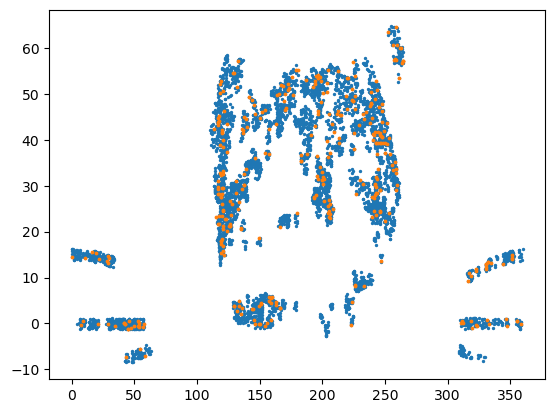

In [6]:
plt.scatter(dataTable['OBJRA'][mask], dataTable['OBJDEC'][mask], label = 'MA', s = 2)
plt.scatter(dataTable['OBJRA'][~mask], dataTable['OBJDEC'][~mask], label= 'Aligned', s = 3)
plt.show()